In [1]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
from pylab import rcParams
from cycler import cycler
rcParams['figure.figsize'] = 16, 9
#rcParams['figure.figsize'] = 5, 5
rcParams.update({'figure.max_open_warning': 0, 'font.size': 14, 'axes.titlesize': 14, 'axes.labelsize': 14,
                 'axes.grid':True, 'xtick.direction': 'in', 'ytick.direction': 'in', 'ytick.right': True,
                 'xtick.top':True,'ytick.major.size': 10, 'xtick.major.size': 10, 'legend.fancybox': True,
                 'legend.markerscale': 0.8, 'legend.handlelength': 5.0, 
                 'axes.prop_cycle': cycler('color',
                                           ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                                            '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
                 #'xtick.labelsize': 12,
                 #'ytick.labelsize': 12
                })

mpl.rcParams['grid.linestyle'] = '-.'
#rcParams.keys() 
#plt.style.use('dark_background')
#print(plt.style.available)

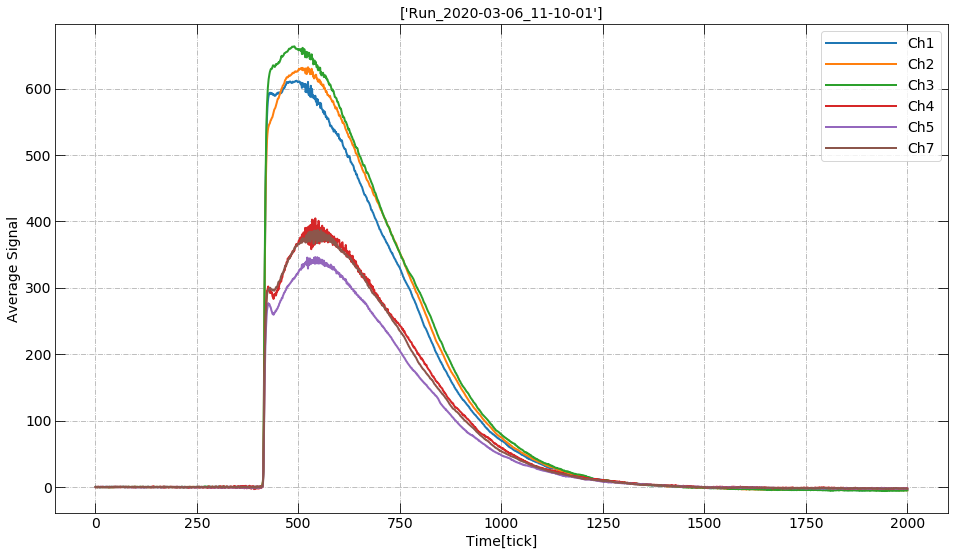

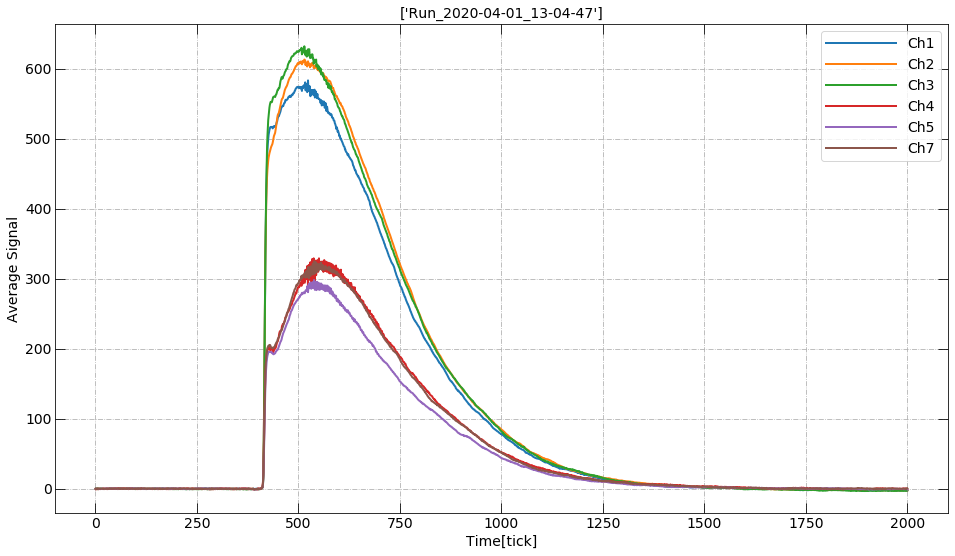

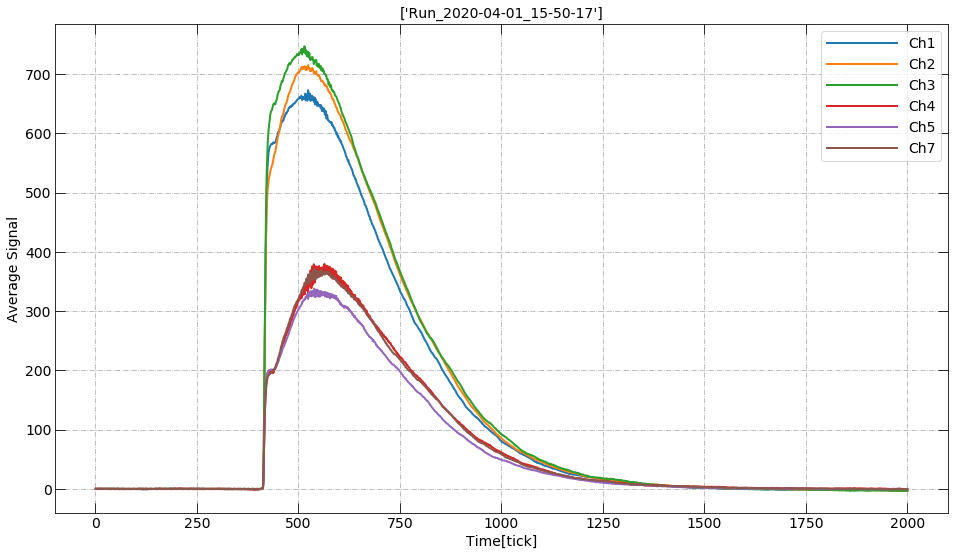

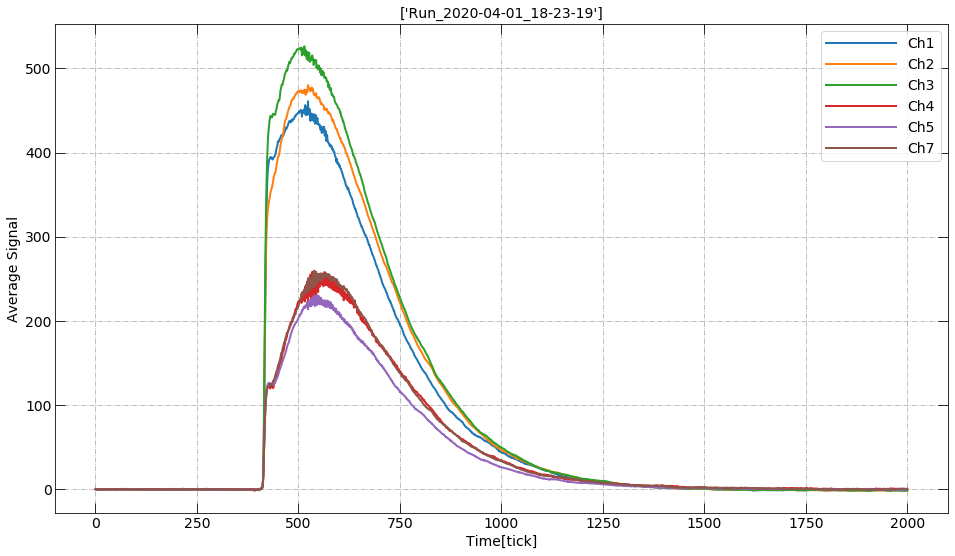

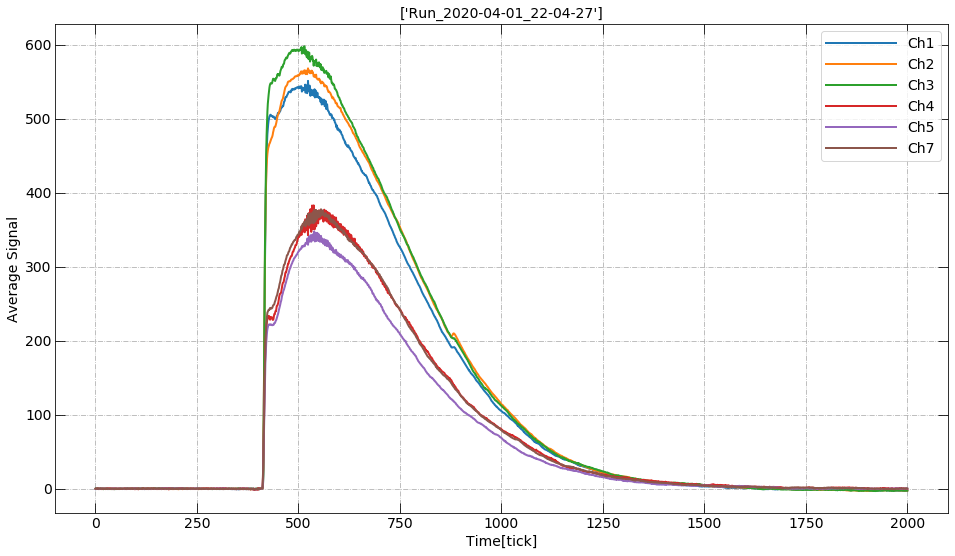

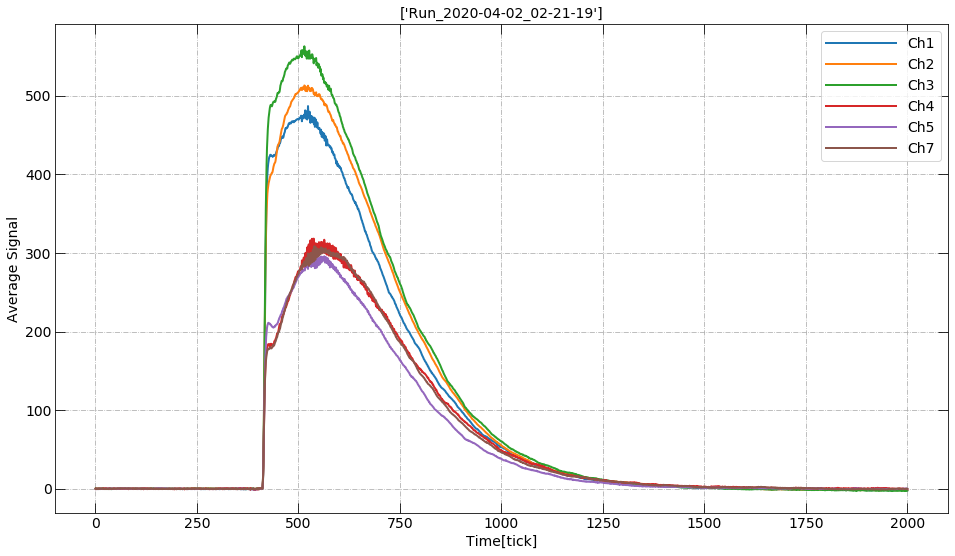

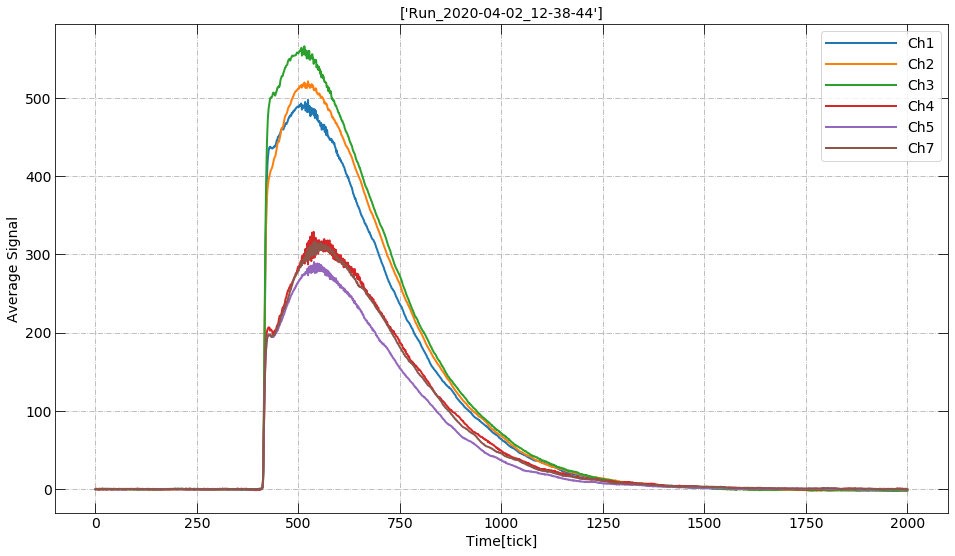

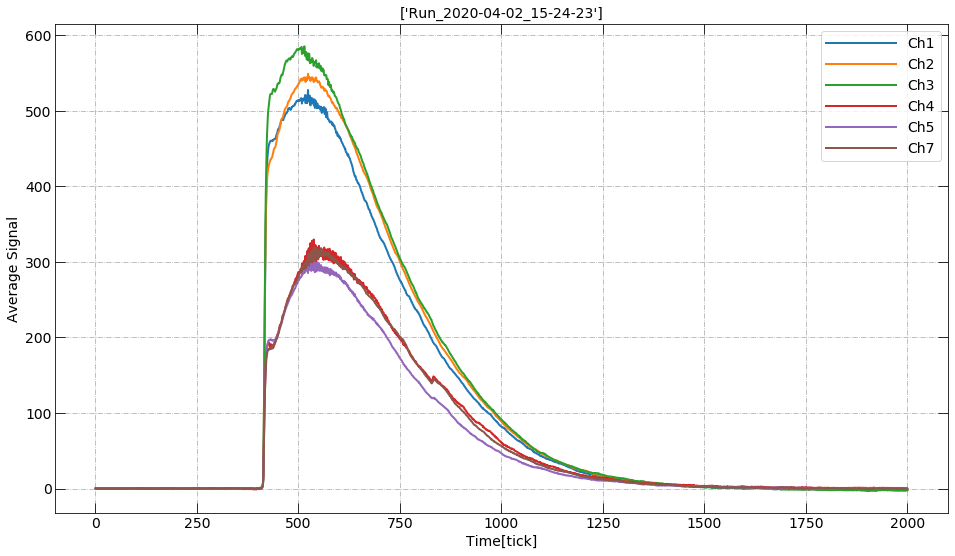

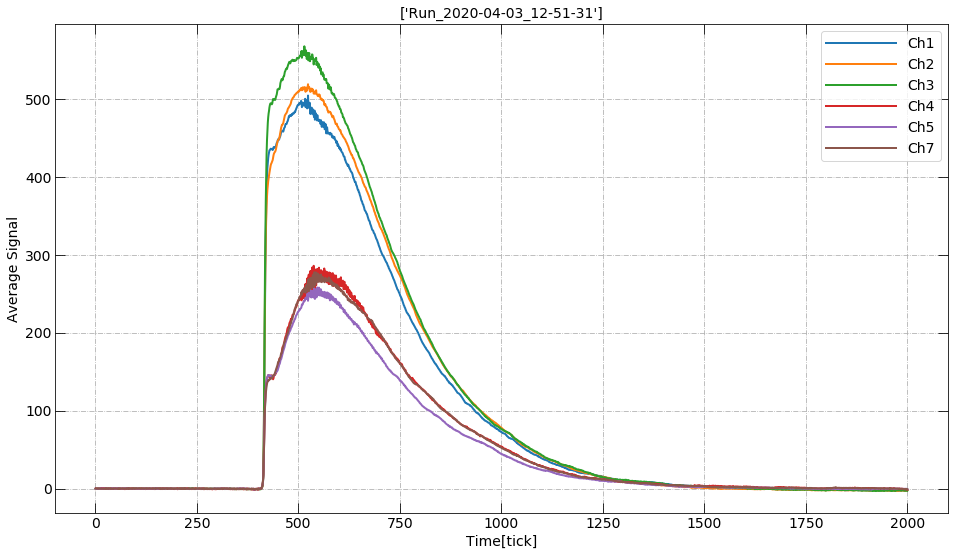

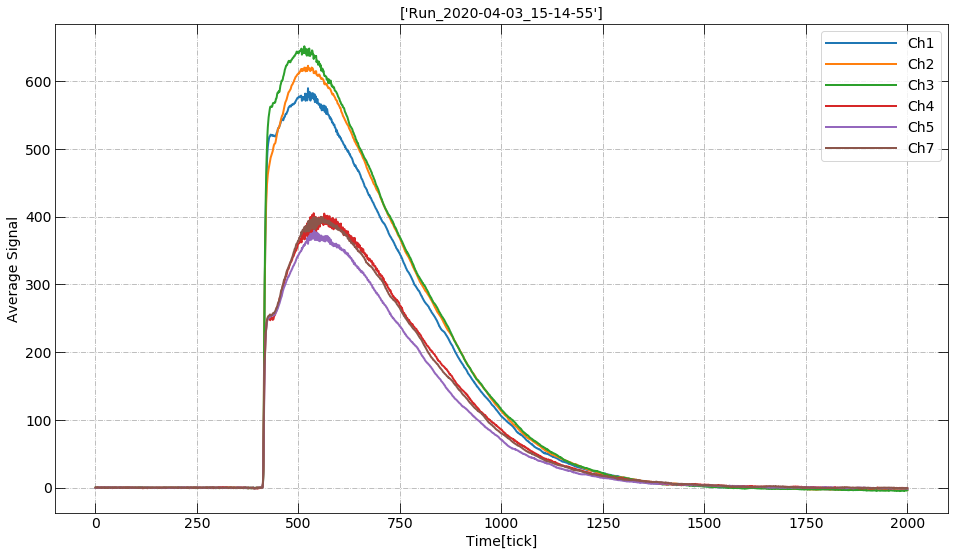

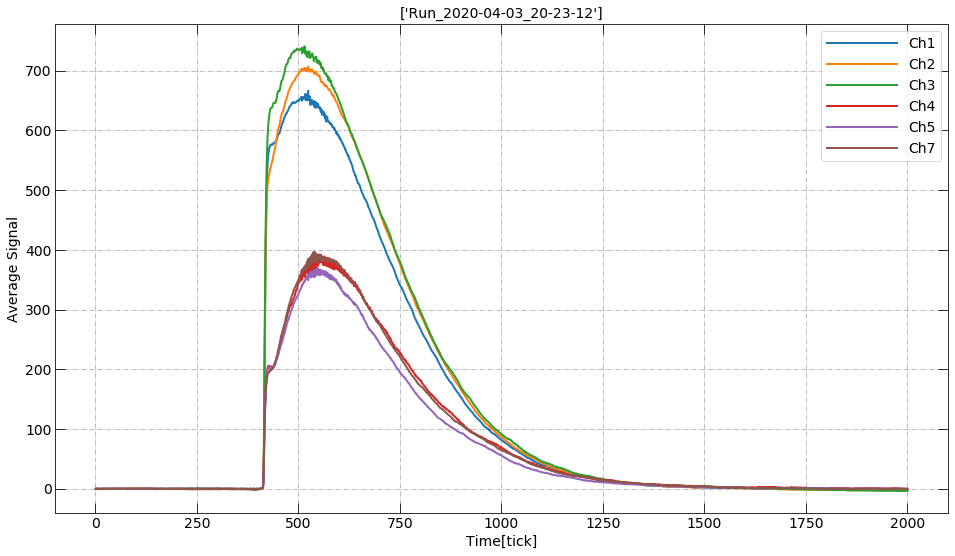

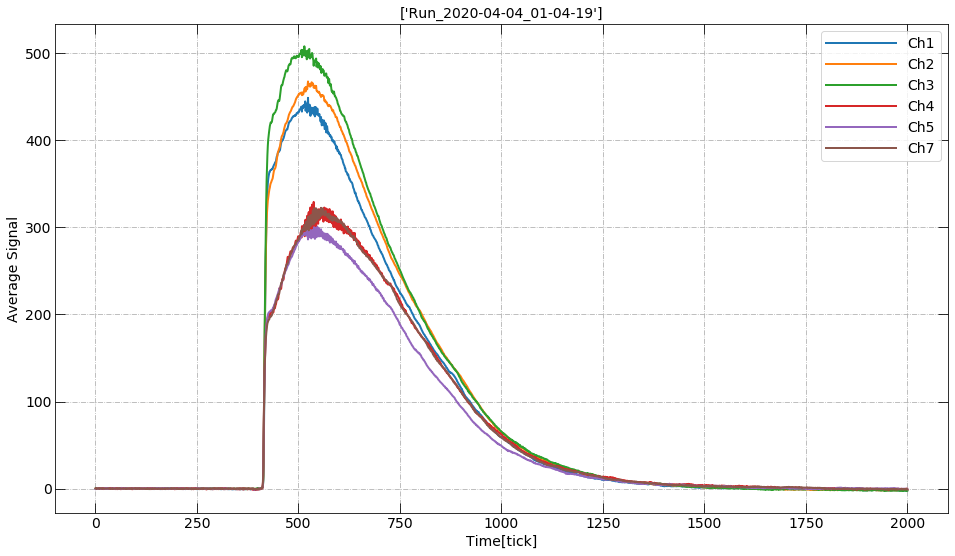

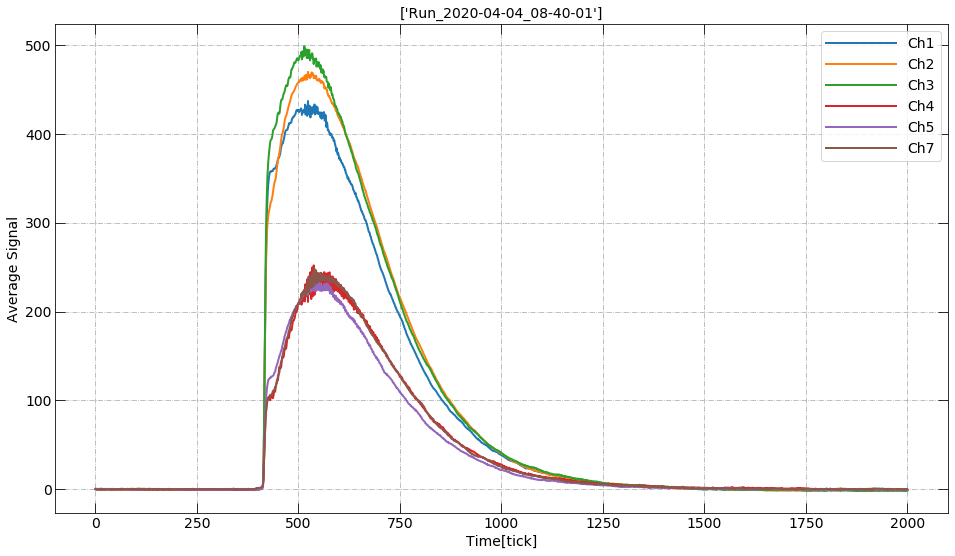

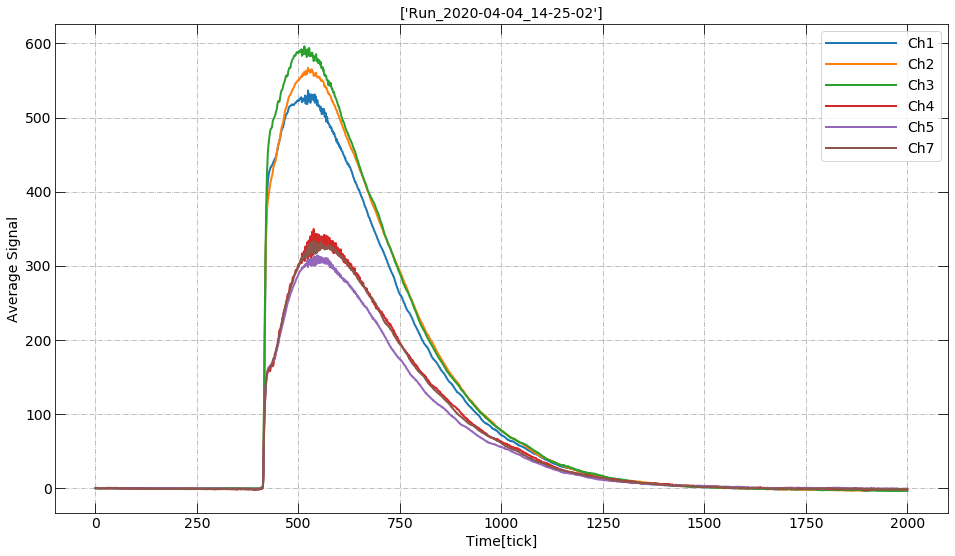

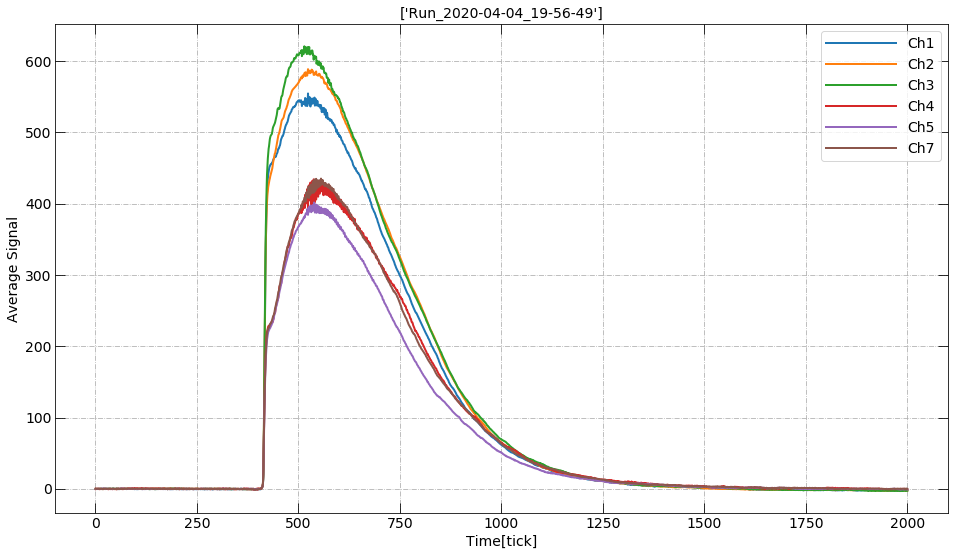

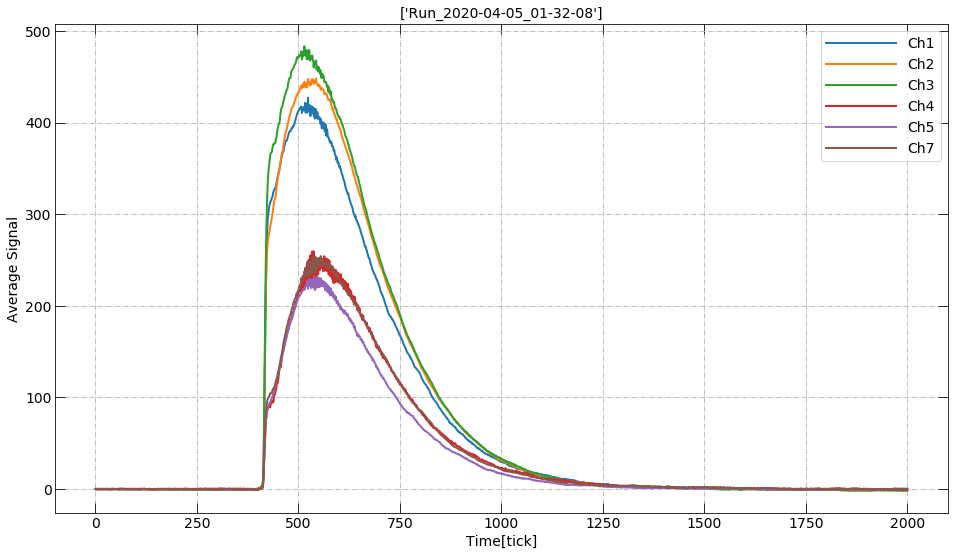

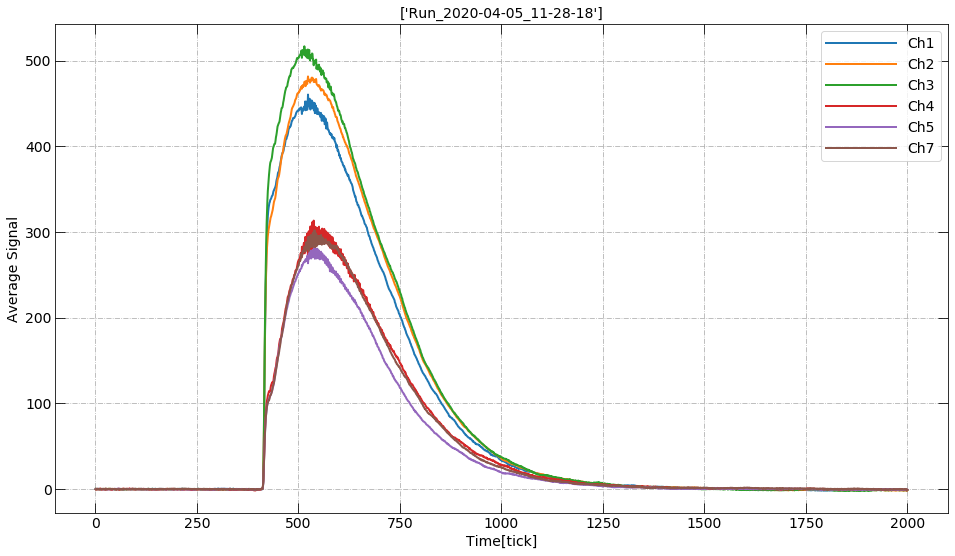

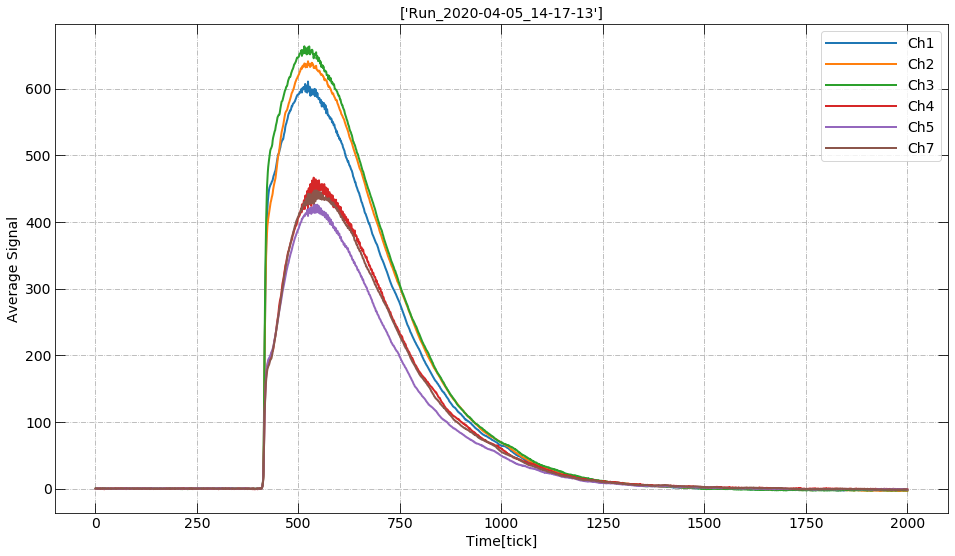

In [4]:
dirname = '/home/furkan/data/single/'
Run = []
if not os.path.exists('all_ch'):
    os.makedirs('all_ch')

for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            #print(str(os.path.splitext(filename)[0]))
            Run = []
            Run: Run.append('Run_' +filename.split('.pkl')[0])
            #print(Run)
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            #pkl_file = open(dirname + str(os.path.splitext(filename)[0]) + '.pkl', 'rb')
            #mydata = pickle.load(pkl_file)

            dict_s ={}
            for key, value in mydata.items():
                #print(mydata[key].max(axis=0))
                channel=mydata[key]
                dict_s.update({key:channel})

            for key, value in dict_s.items():
                plt.plot(range(1, len(value) + 1), value, label=key, linewidth=2)
                # NOTE: changed `range(1, 4)` to mach actual values count
            plt.title(Run)
            plt.xlabel('Time[tick]')
            plt.ylabel('Average Signal')
            plt.ticklabel_format(style='plain')
            #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
            plt.legend() 
            #plt.yscale('log')
            #plt.xlim(300, 1800)
            #plt.ylim(-25, 70)
            #plt.xlim(300, 1500)

            plot_path = os.path.abspath('all_ch') 
            plot_name = 'all_ch'+str(filename.split('.pkl')[0])+'.png'
            plt.savefig(os.path.join(plot_path, plot_name))
            plt.show()


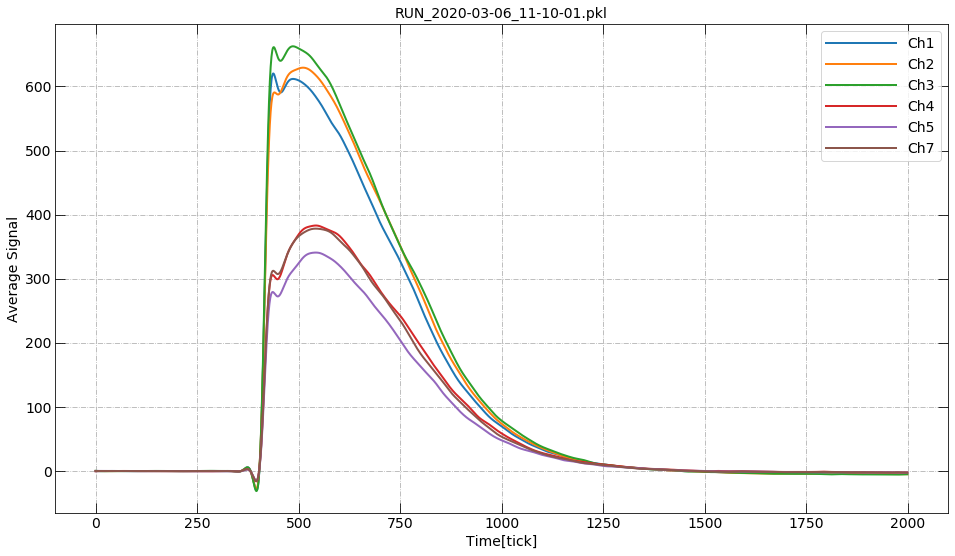

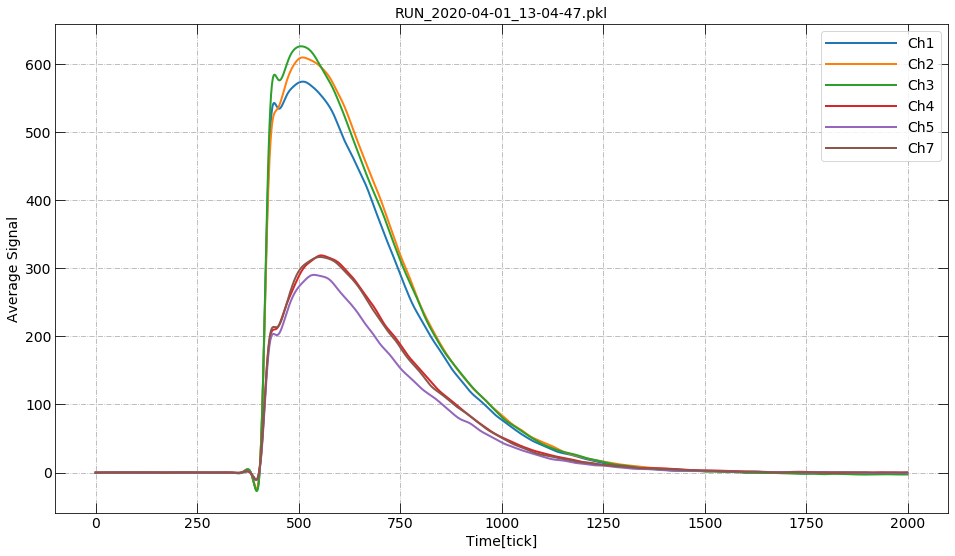

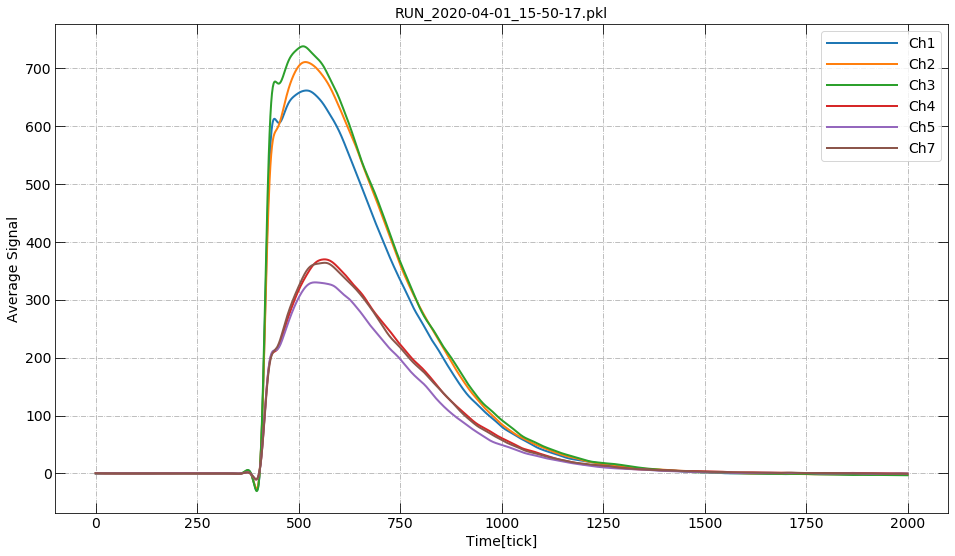

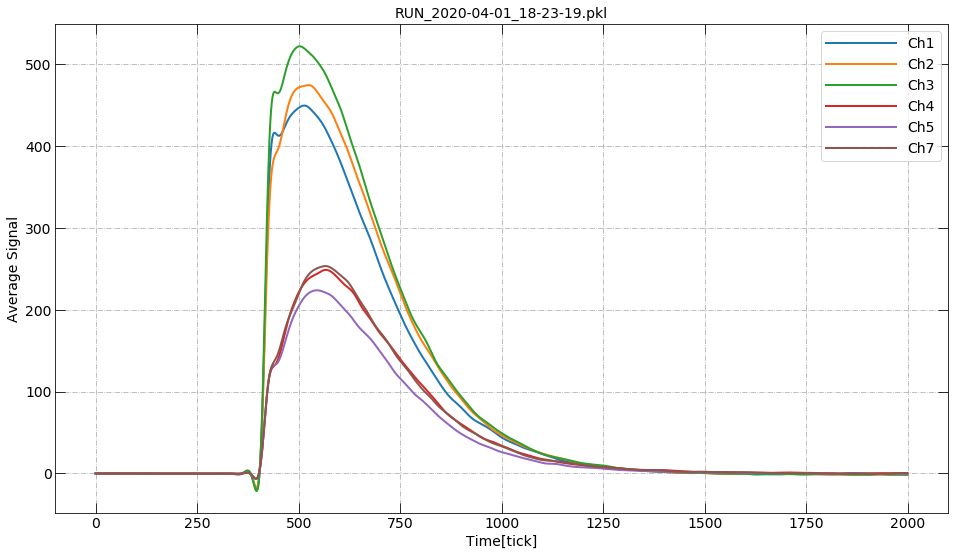

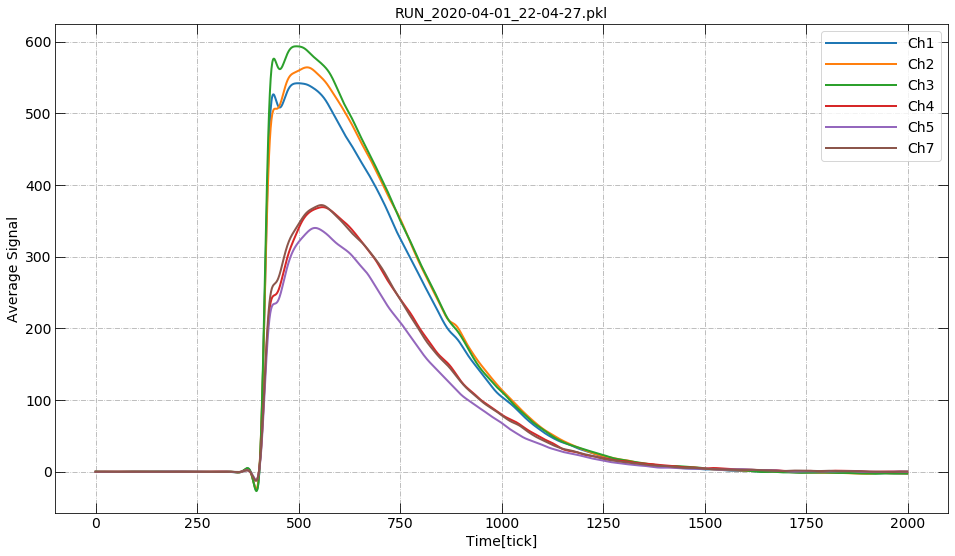

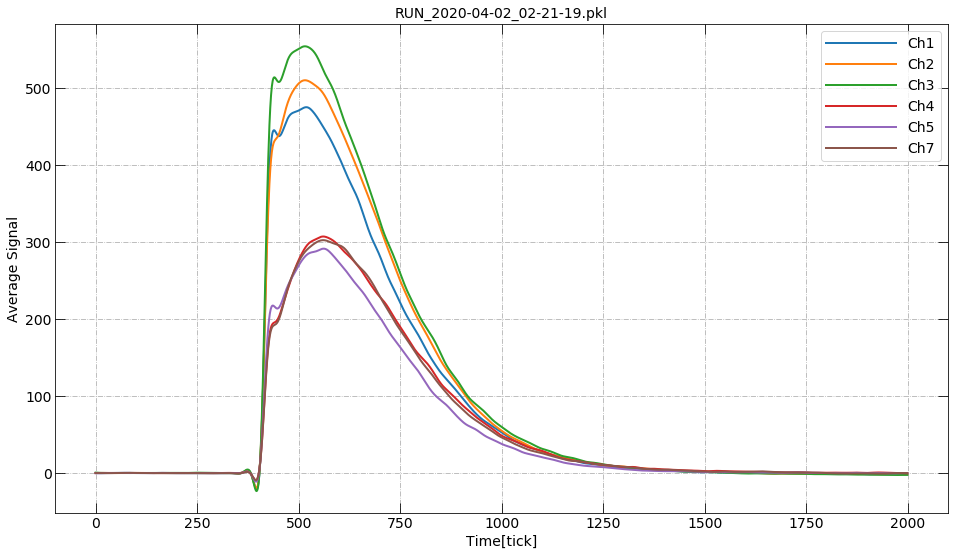

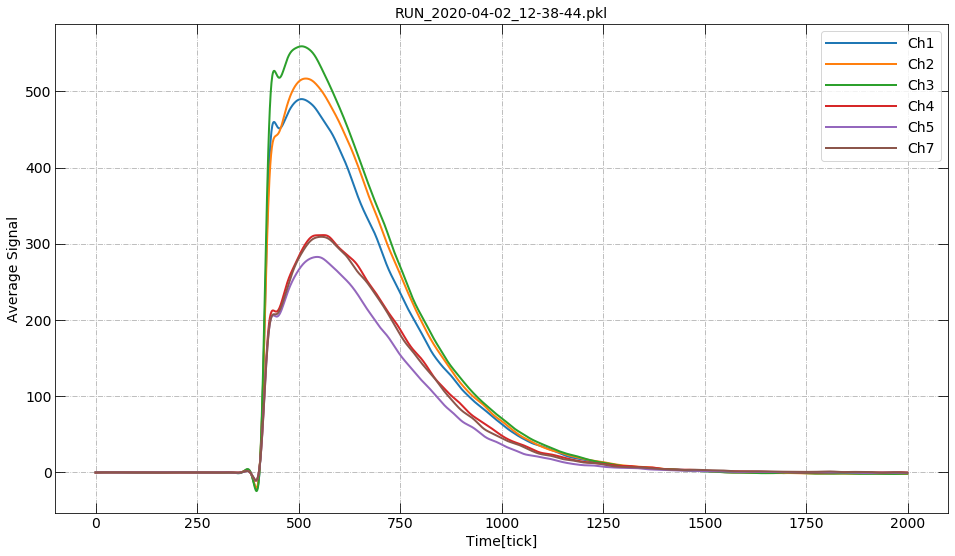

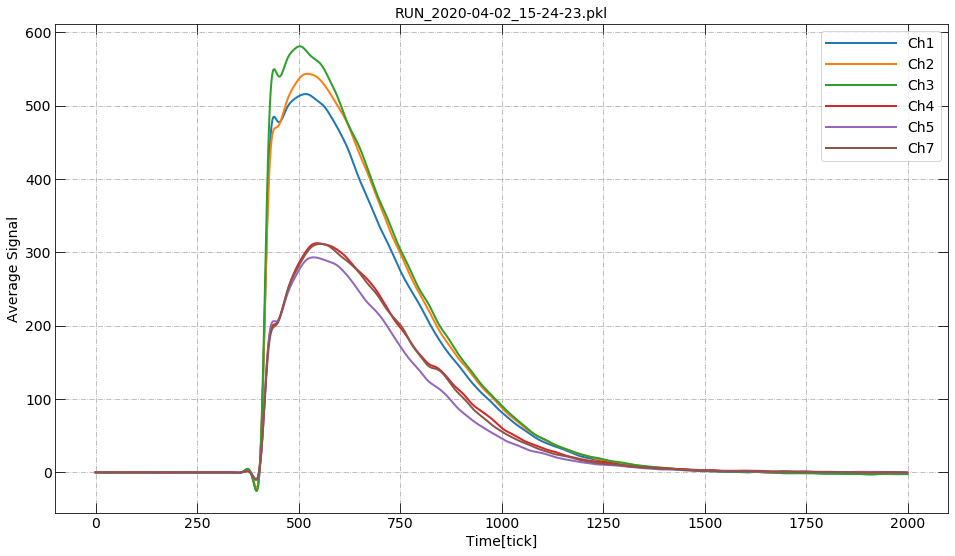

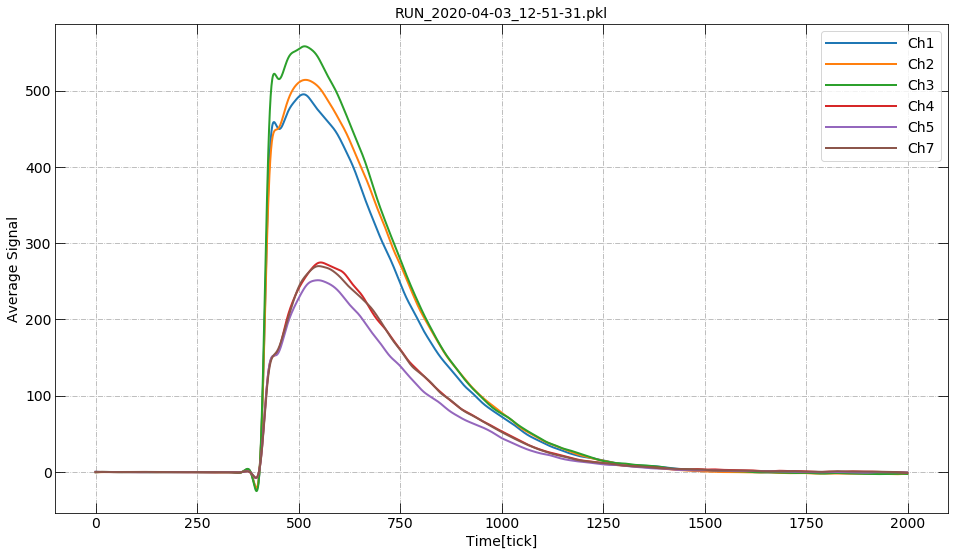

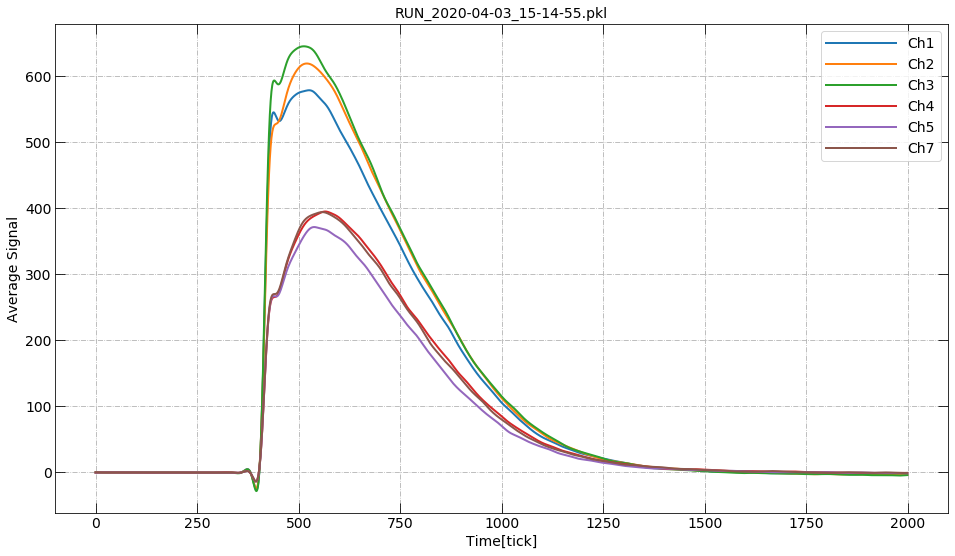

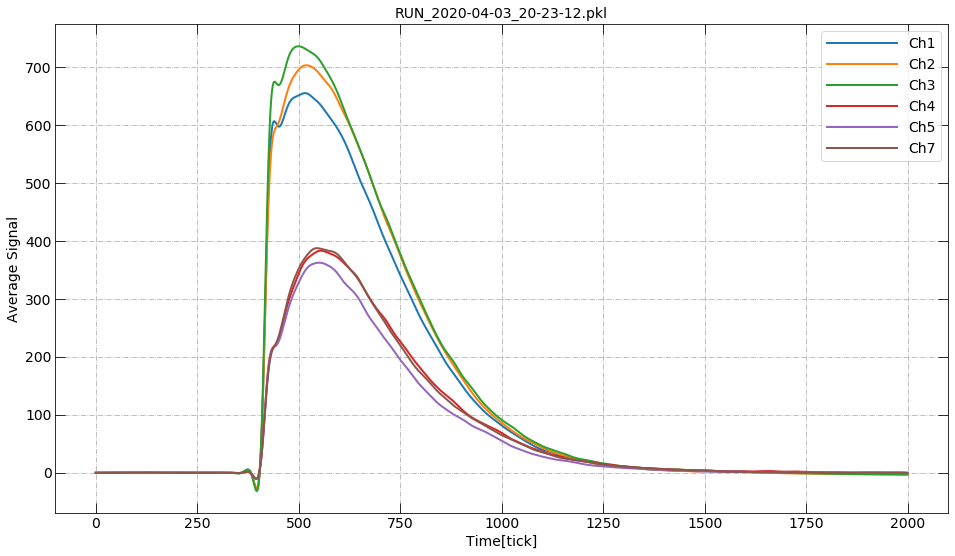

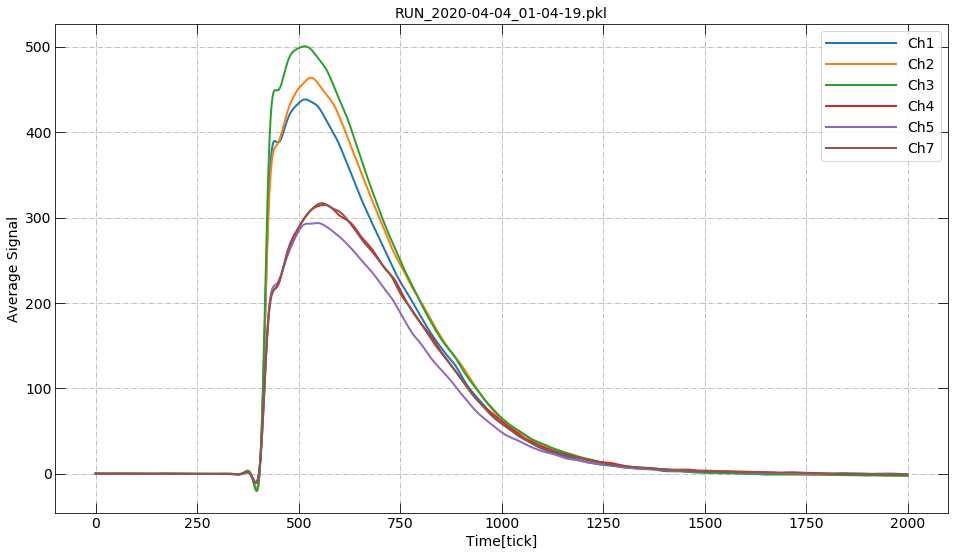

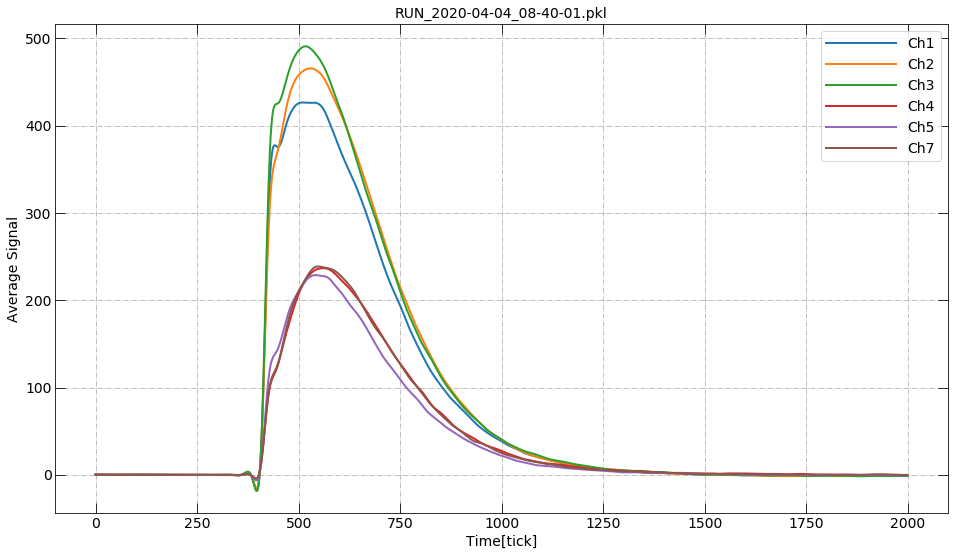

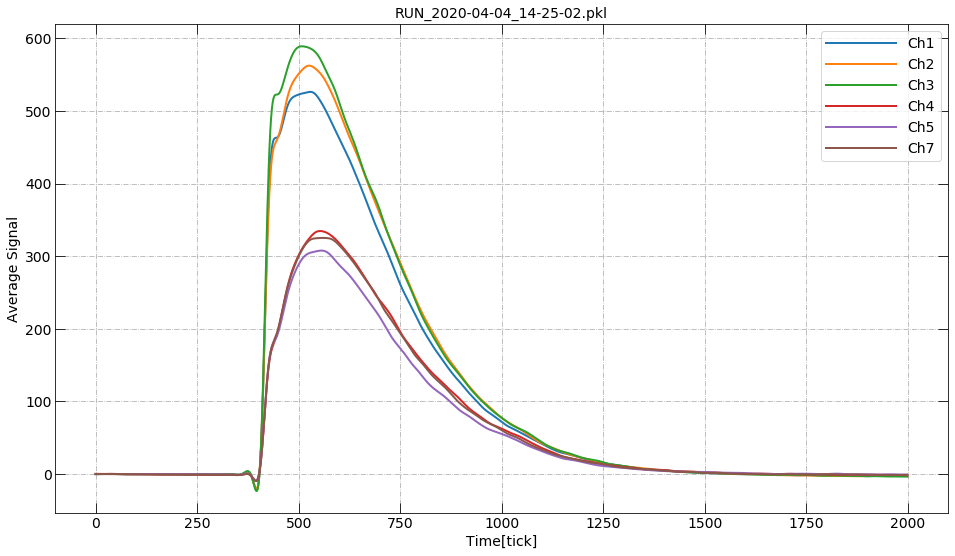

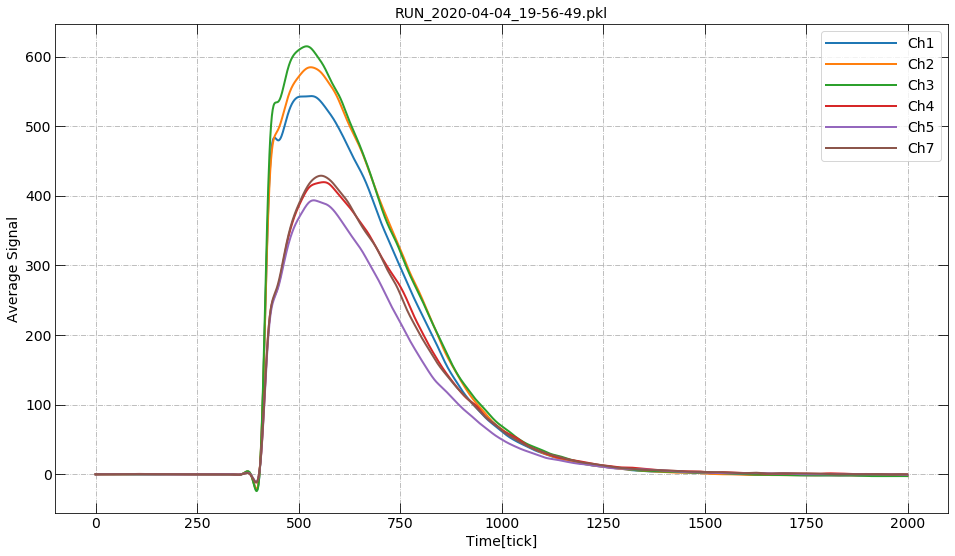

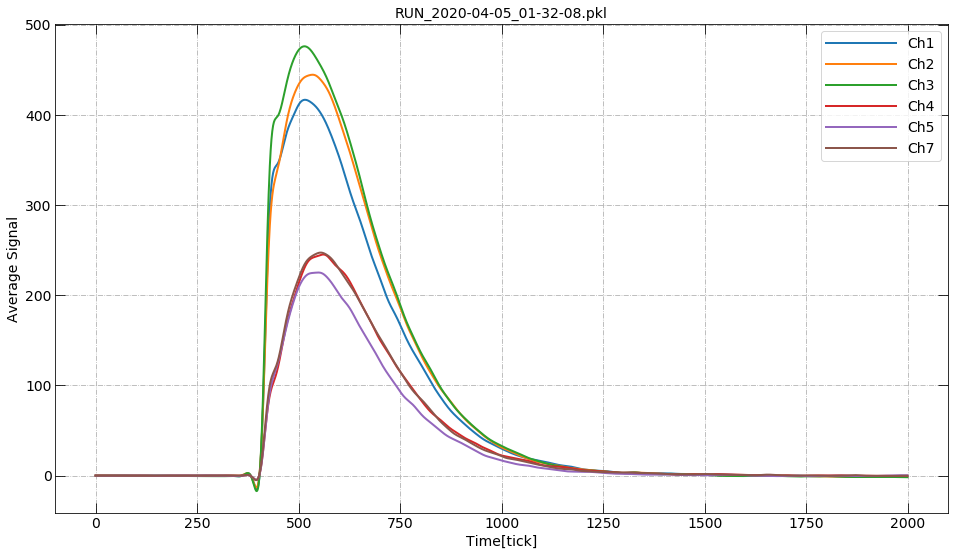

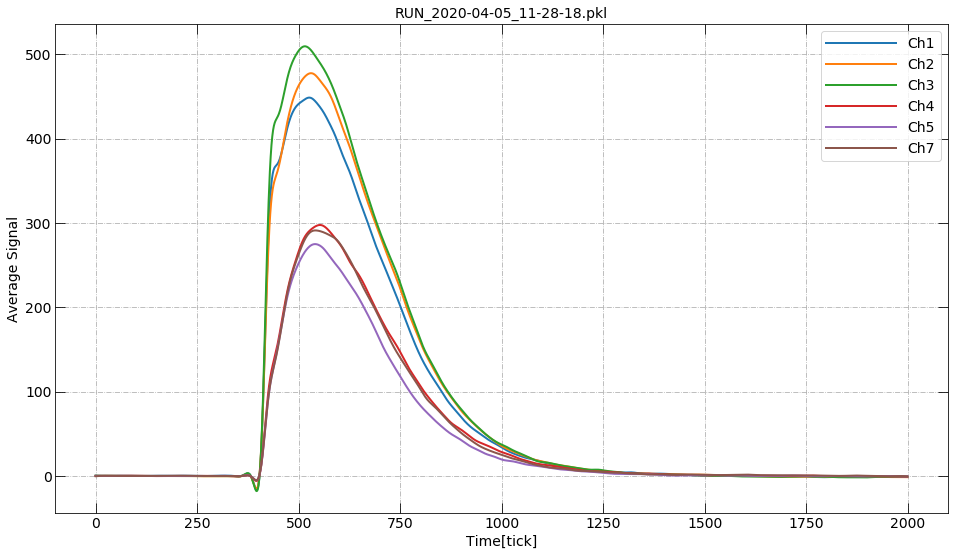

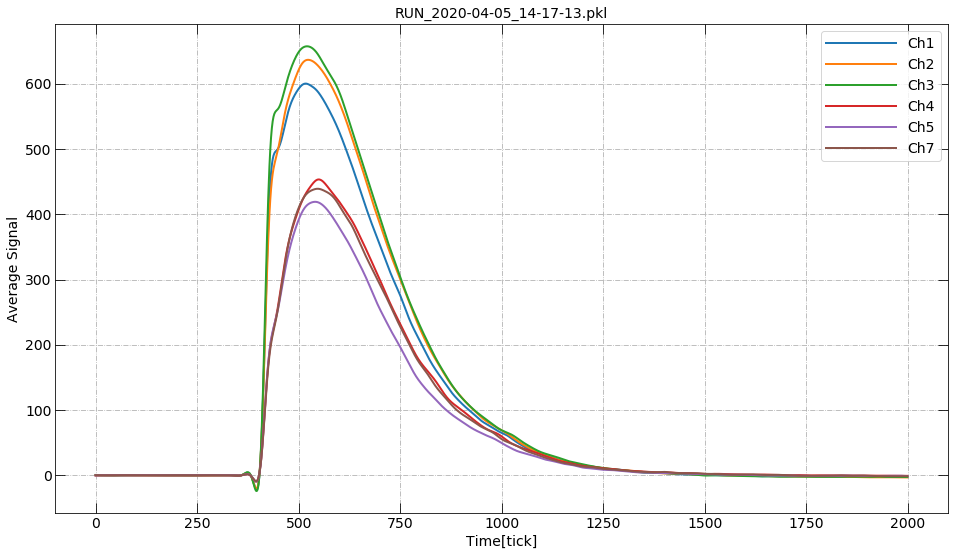

In [5]:
if not os.path.exists('filt'):
    os.makedirs('filt')
for filename in sorted(os.listdir(dirname)):
    if '.pkl.gz' in filename:
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)

            dict_s ={}
            for key, value in mydata.items():
                # lowpass filter
                b, a = signal.butter(3, 0.05)
                channel = signal.filtfilt(b, a, value)
                 
                dict_s.update({key:channel})

            for key, value in dict_s.items():
                xtime=range(1, len(value) + 1),
                plt.plot(value, label=key, linewidth=2)
            plt.title('RUN_'+str(os.path.splitext(filename)[0]))
            plt.grid(True)
            #plt.yscale('log')
            plt.legend()
           # plt.xlim(300, 1800)
           # plt.ylim(-25, 70)
            plt.xlabel('Time[tick]')
            plt.ylabel('Average Signal')
            plot_path = os.path.abspath('filt') 
            plot_name = 'filt'+str(filename.split('.pkl')[0])+'.png'
            plt.savefig(os.path.join(plot_path, plot_name))
            plt.show()    

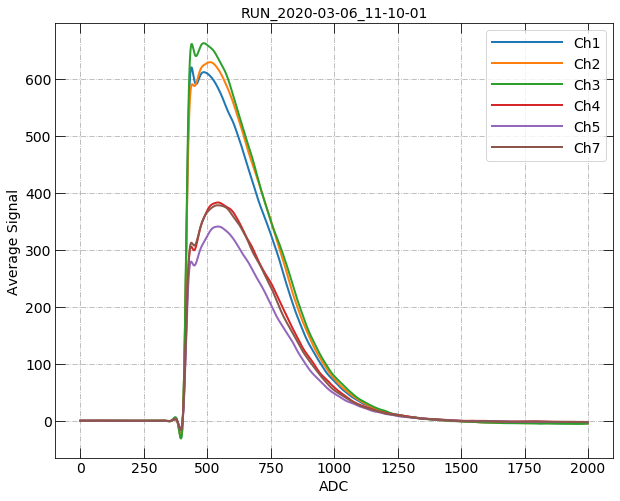

In [63]:
if not os.path.exists('run_filt'):
    os.makedirs('run_filt')
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)

            dict_s ={}
            for key, value in mydata.items():
                # lowpass filter
                b, a = signal.butter(3, 0.05)
                channel = signal.filtfilt(b, a, value)
                 


                dict_s.update({key:channel})

            for key, value in dict_s.items():
                xtime=range(1, len(value) + 1),
                plt.plot(value, label=key, linewidth=2)
            plt.title('RUN_'+str(os.path.splitext(filename)[0]))
            plt.grid(True)
            #plt.yscale('log')
            plt.legend()
           # plt.xlim(300, 1800)
           # plt.ylim(-25, 70)
            plt.xlabel('ADC')
            plt.ylabel('Average Signal')
            plot_path = os.path.abspath('run_filt') 
            plot_name = 'run_filt'+str(filename.split('.pkl')[0])+'.png'
            plt.savefig(os.path.join(plot_path, plot_name))
            plt.show()    

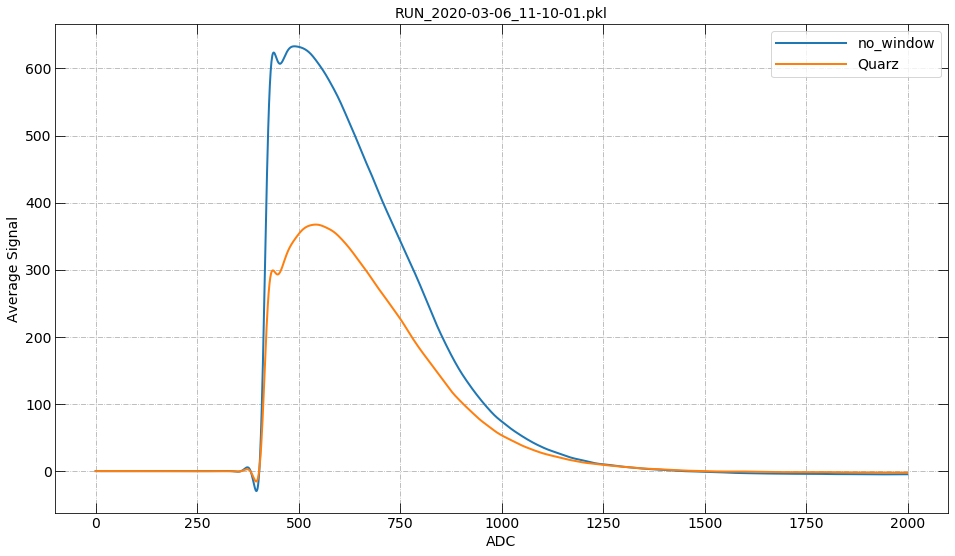

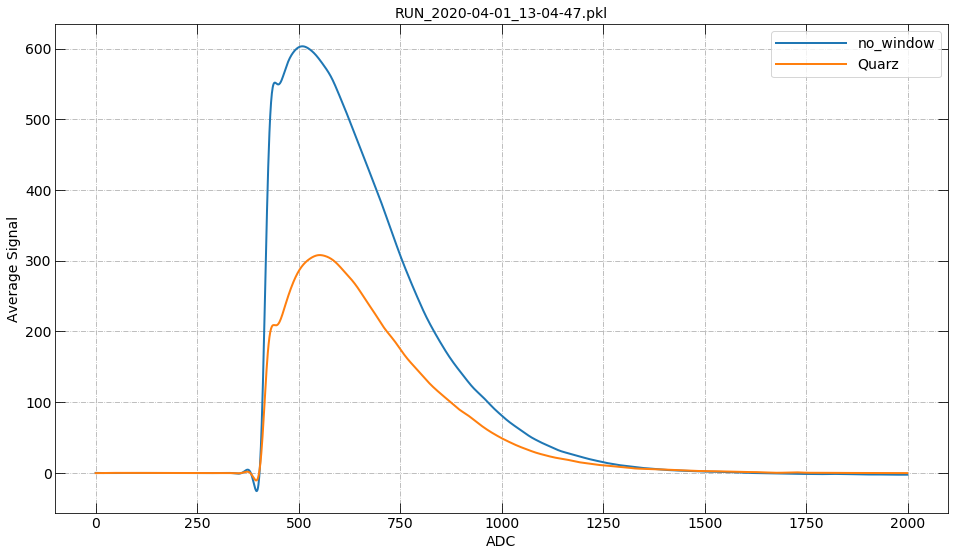

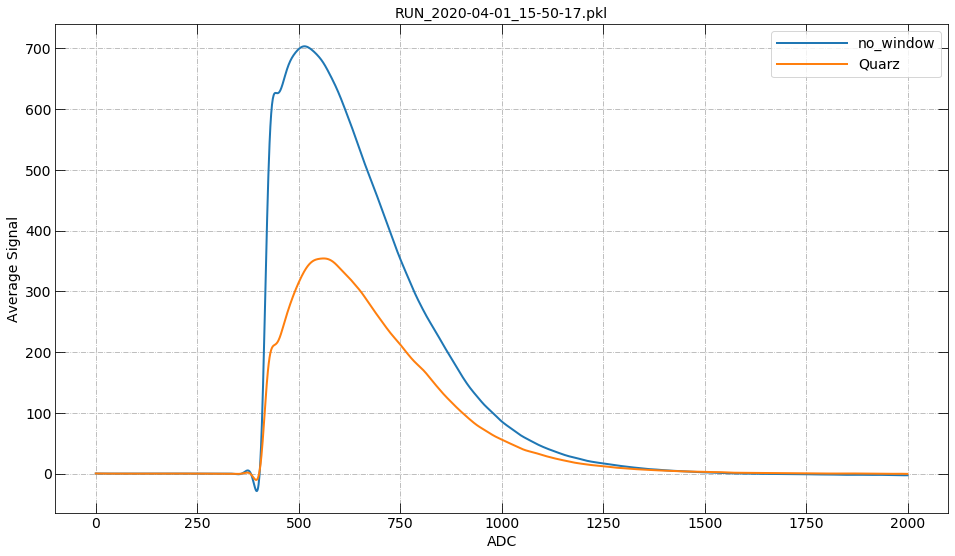

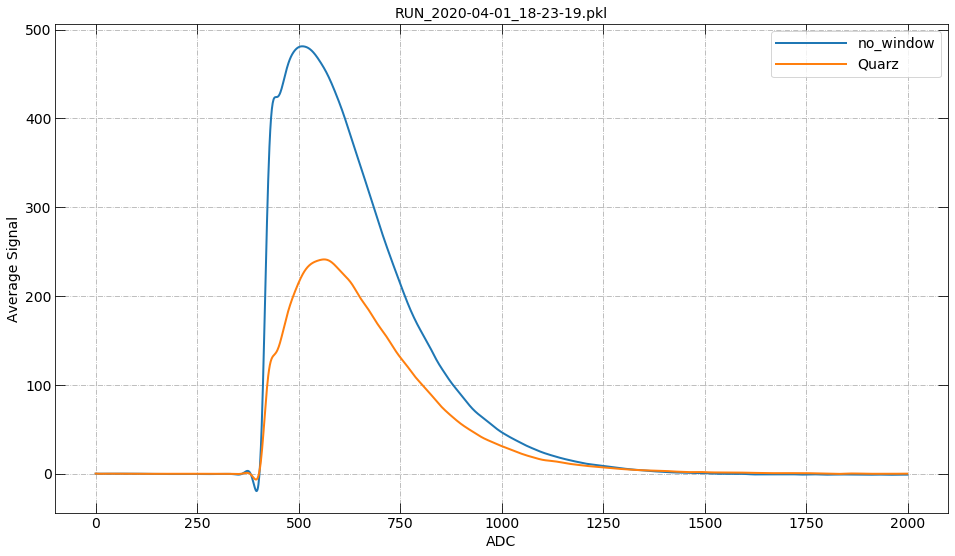

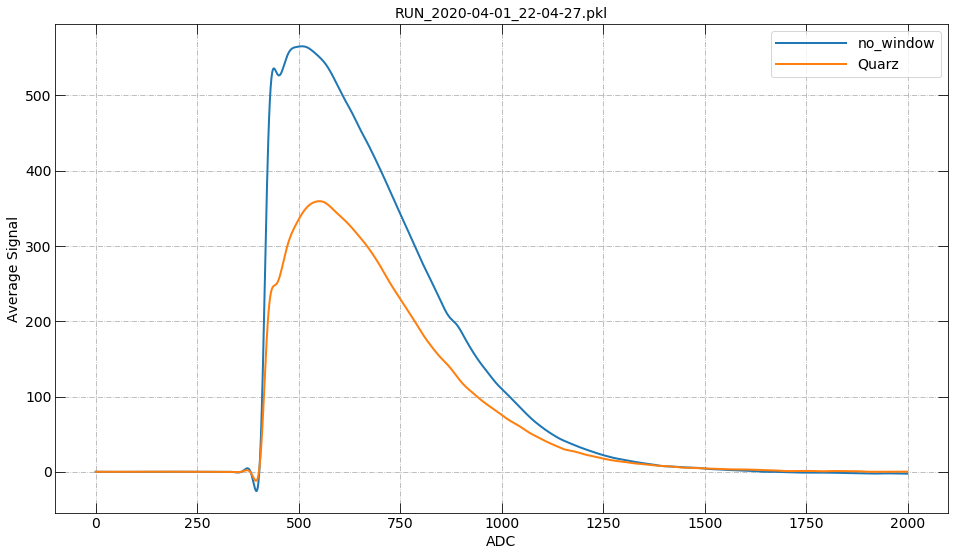

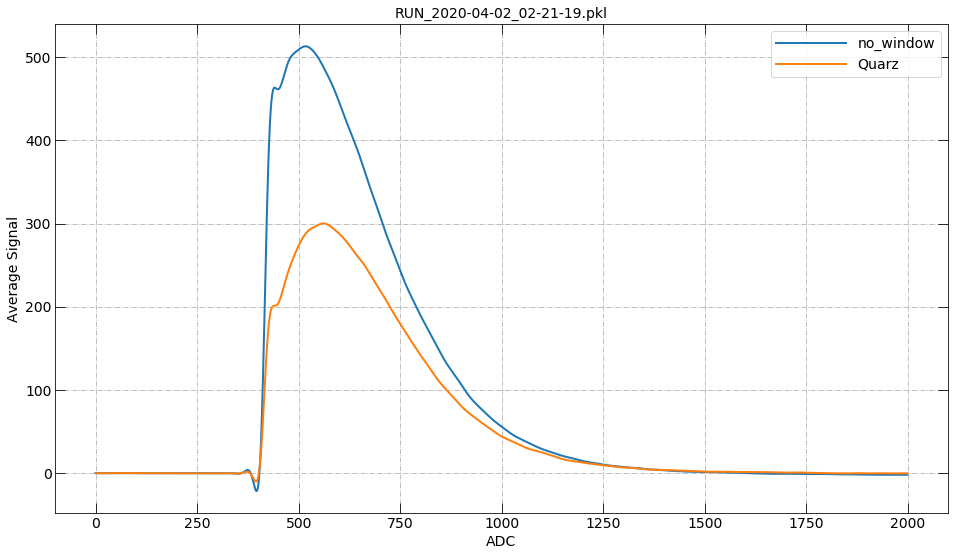

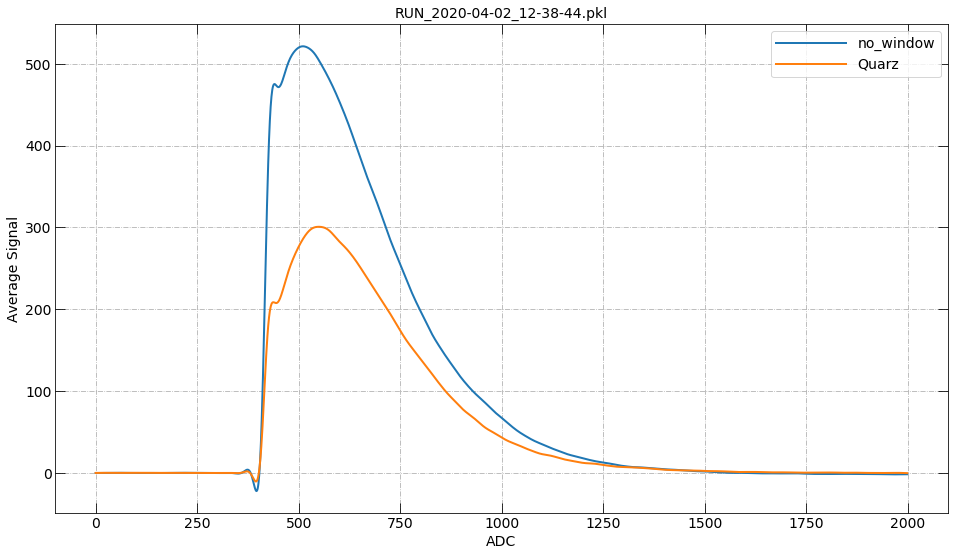

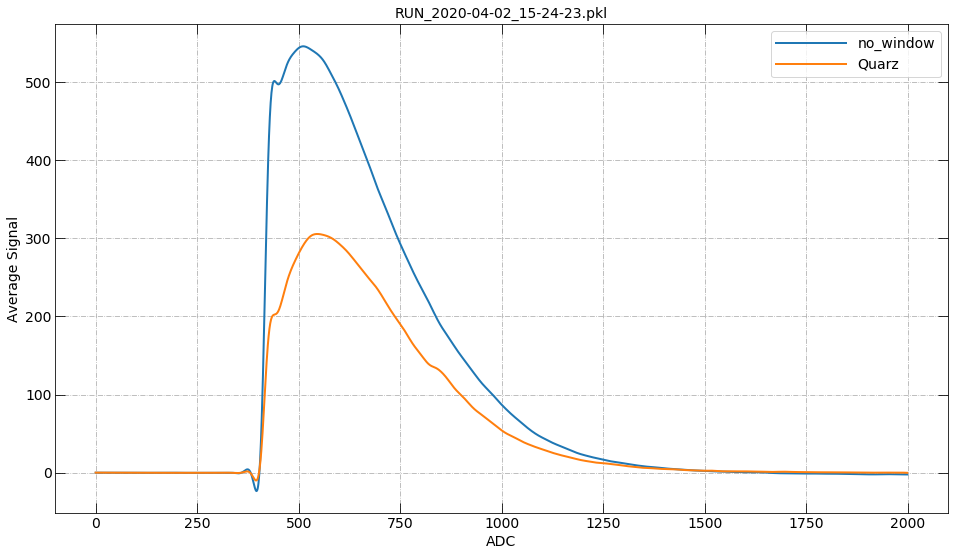

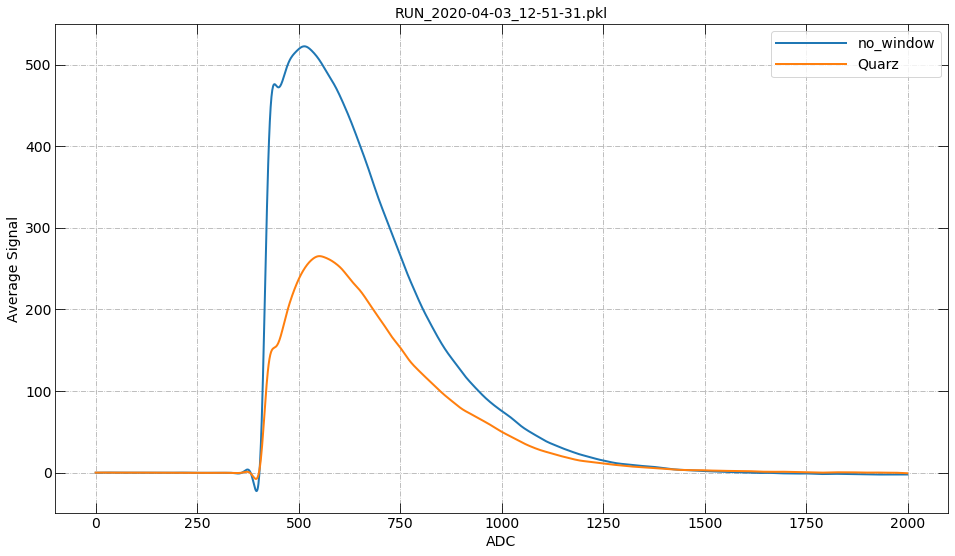

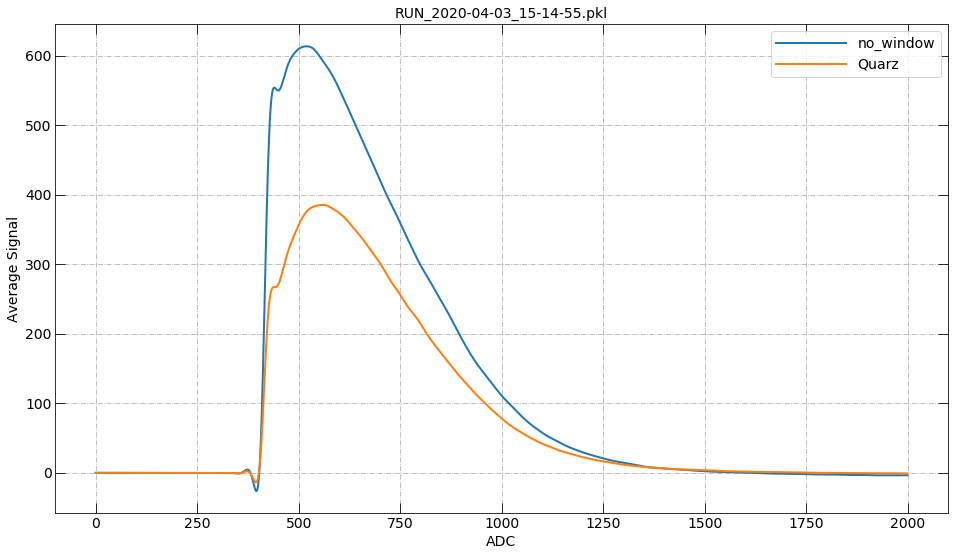

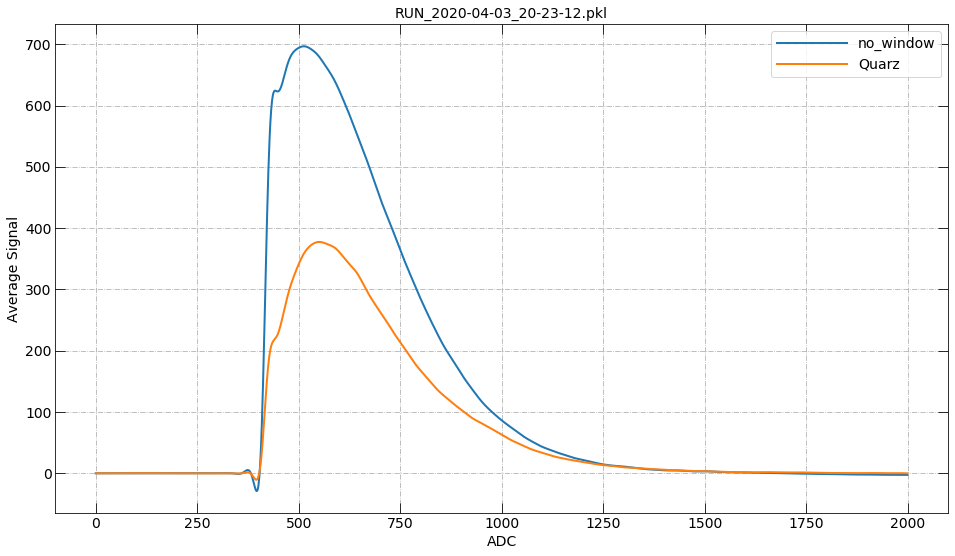

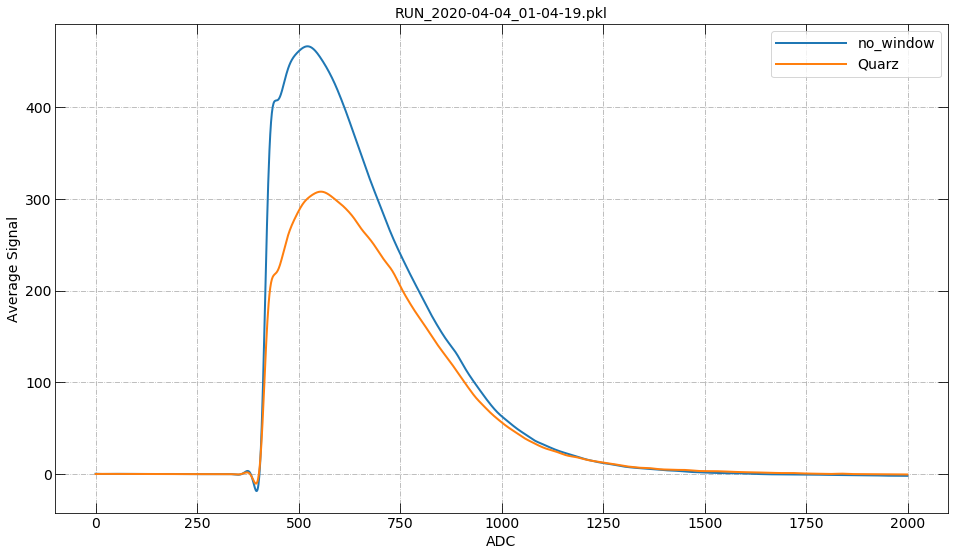

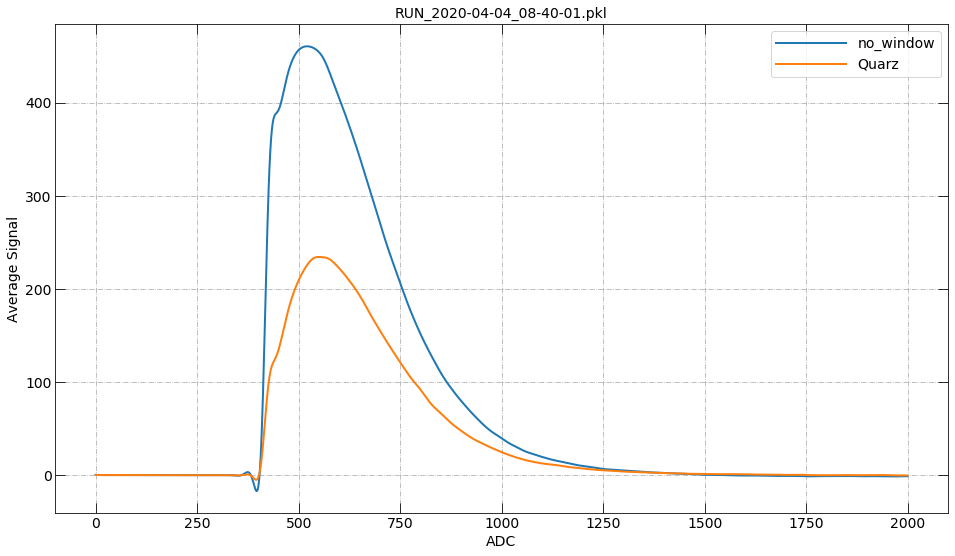

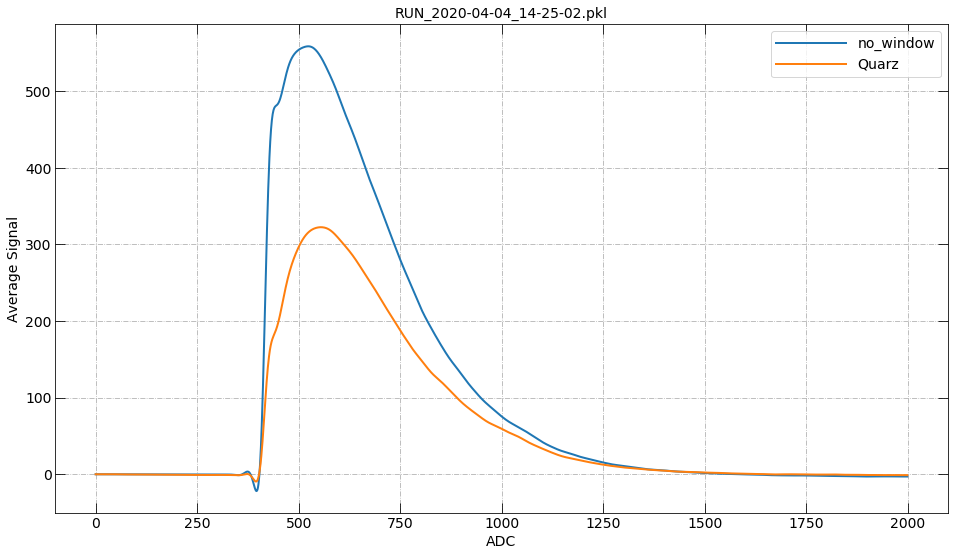

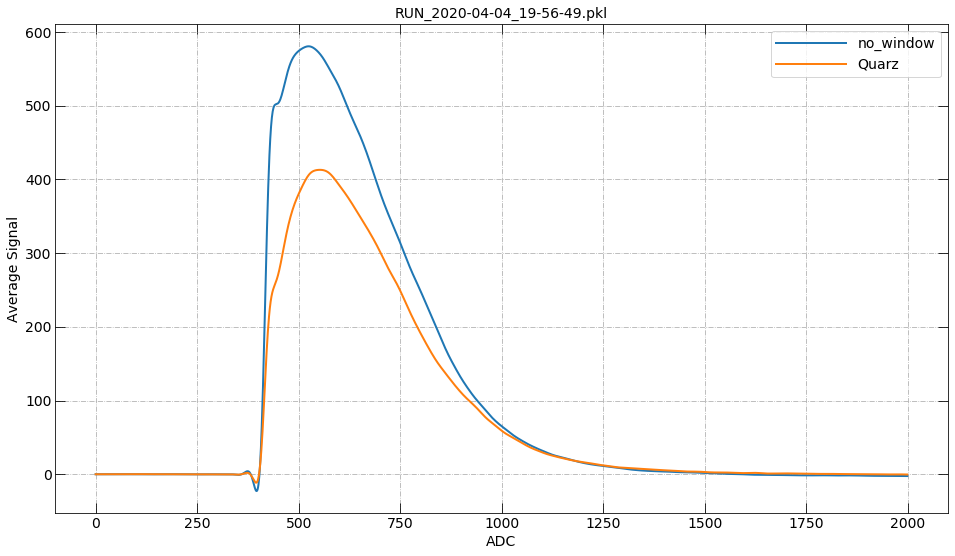

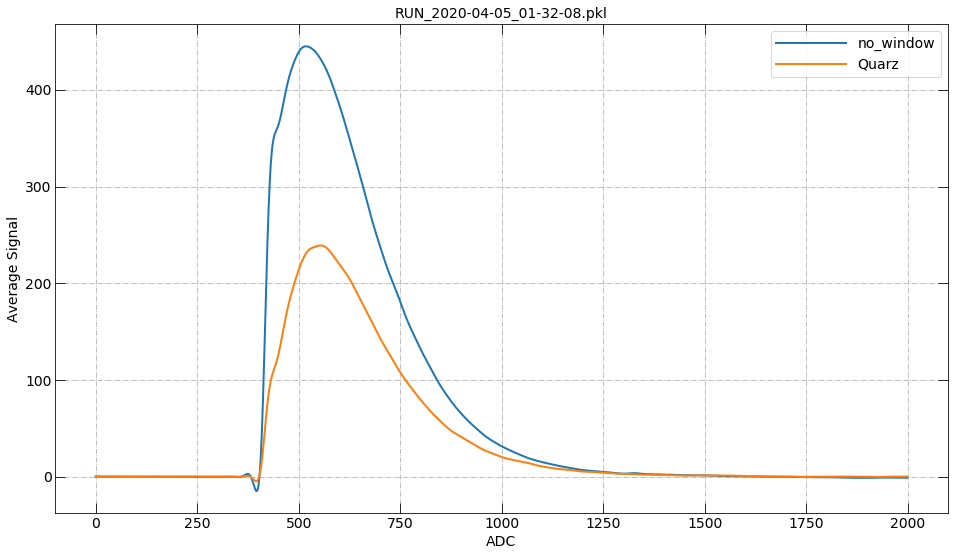

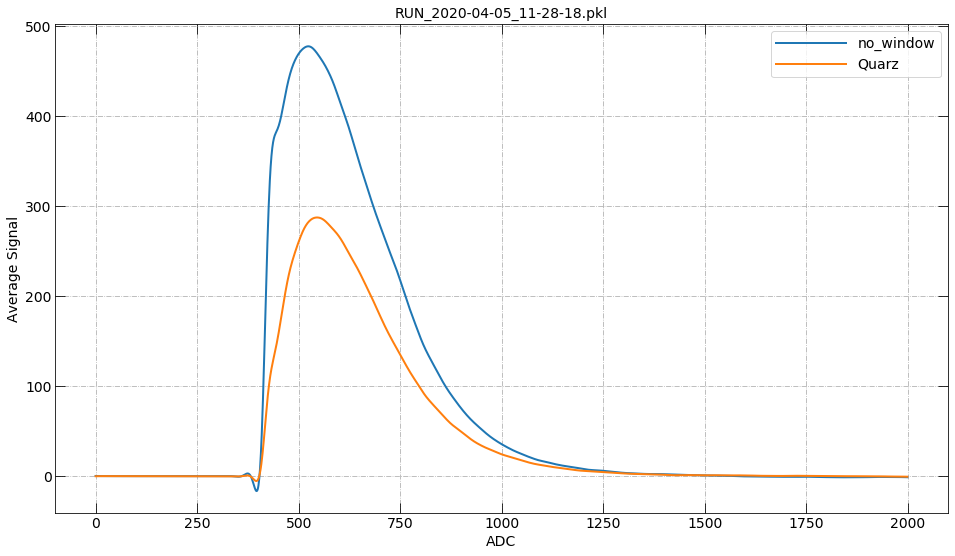

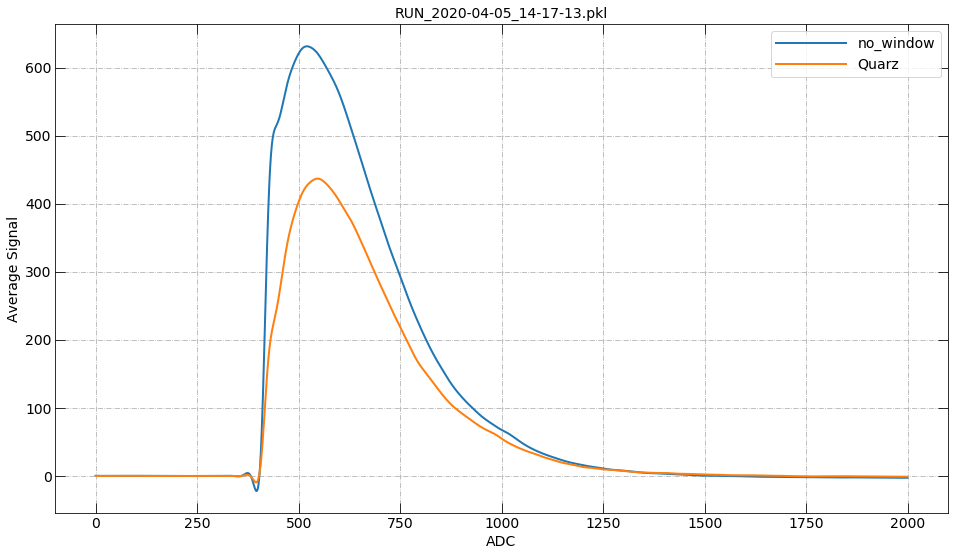

In [6]:
dirname = '/home/furkan/data/single/'
Run = []
if not os.path.exists('LAr'):
    os.makedirs('LAr')
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            #print(filename)
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)

            dict_s ={}
            for key, value in mydata.items():
                # filtfilt
                b, a = signal.butter(3, 0.05)
                channel = signal.filtfilt(b, a, value)
                dict_s.update({key:channel})
                #dict_s.update({key:value})
            
            no_window = np.mean([dict_s['Ch1'], dict_s['Ch2'], dict_s['Ch3']], axis=0 )
            #print(no_window)
            baseline = no_window[100:400].mean()
            
            dict_s.update({'no_window':no_window - 0})
            
            Quarz = np.mean([dict_s['Ch4'], dict_s['Ch5'], dict_s['Ch7']], axis=0 )
            baseline = Quarz[100:400].mean()
            #np.set_printoptions(threshold=np.inf)
            #print(Quarz)
            dict_s.update({'Quarz':Quarz})
            LAr = no_window - Quarz*1.25
            baseline = LAr[100:400].mean()
            
            dict_s.update({'LAr':LAr-0})
            
            for key, value in dict_s.items():
                if 'no_window'==key or 'Quarz'==key: #or 'LAr'==key:
                #if 'LAr'==key:
                    ydata = value
                    xdata = np.arange(len(ydata))

                    #plt.plot(value, label=key, linewidth=2)
                    plt.plot(ydata, '-', label=key,linewidth=2)

                                     
            #plt.xlim(400, 600)
            #plt.yscale('log')
          #  plt.xlim(300, 1800)
          #  plt.ylim(-25, 70)
            plt.legend()
            plt.title("RUN_" + str(os.path.splitext(filename)[0]))
            plt.xlabel('ADC')
            plt.ylabel('Average Signal')
            plot_path = os.path.abspath('LAr') 
            plot_name = 'LAr'+str(filename.split('.pkl')[0])+'.png'
            plt.savefig(os.path.join(plot_path, plot_name))
            plt.show()    

In [14]:
int_dict

{'Ch1_Run_[2020-03-27_13-43-43]': 14778,
 'Ch1_Run_[2020-03-27_16-58-11]': 14983,
 'Ch1_Run_[2020-03-28_12-34-46]': 14928,
 'Ch1_Run_[2020-03-28_16-08-07]': 17333,
 'Ch1_Run_[2020-03-28_20-21-37]': 16086,
 'Ch1_Run_[2020-03-29_11-53-05]': 15079,
 'Ch1_Run_[2020-03-29_15-48-35]': 14074,
 'Ch1_Run_[2020-03-29_19-14-10]': 15070,
 'Ch1_Run_[2020-03-29_21-44-54]': 13878,
 'Ch1_Run_[2020-03-30_09-28-09]': 15693,
 'Ch1_Run_[2020-03-30_13-03-04]': 14129,
 'Ch1_Run_[2020-03-30_17-21-51]': 16354,
 'Ch1_Run_[2020-03-30_22-28-09]': 15041,
 'Ch1_Run_[2020-03-31_12-41-01]': 14559,
 'Ch1_Run_[2020-03-31_21-11-23]': 16959,
 'Ch1_Run_[2020-04-01_13-04-47]': 15843,
 'Ch1_Run_[2020-04-01_15-50-17]': 18867,
 'Ch1_Run_[2020-04-01_18-23-19]': 15414,
 'Ch1_Run_[2020-04-01_22-04-27]': 14743,
 'Ch1_Run_[2020-04-02_02-21-19]': 16267,
 'Ch1_Run_[2020-04-02_12-38-44]': 16559,
 'Ch1_Run_[2020-04-02_15-24-23]': 14802,
 'Ch1_Run_[2020-04-02_21-45-44]': 15555,
 'Ch1_Run_[2020-04-03_12-51-31]': 15188,
 'Ch1_Run_[2020-